In [12]:
from sklearn.datasets import make_circles 
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

In [13]:
X,Y= make_circles(
    n_samples=500,
    noise=0.03,
    random_state=None)

In [14]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


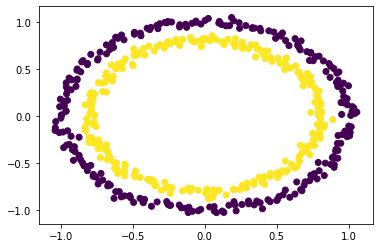

In [15]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [16]:
def phi(X):
    x1=X[:,0]
    x2=X[:,1]
    x3=x1**2+x2**2
    X_=np.zeros((X.shape[0],3))
    print(X_.shape)
    X_[:,0]=x1
    X_[:,1]=x2
    X_[:,2]=x3
    return X_

In [17]:
X_=phi(X)

(500, 3)


In [48]:
def plot3d(X,y, show=True):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    X1=X[:,0]
    X2=X[:,1]
    X3=X[:,2]
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=y,depthshade=True)
    if show:
        plt.show()
    return ax

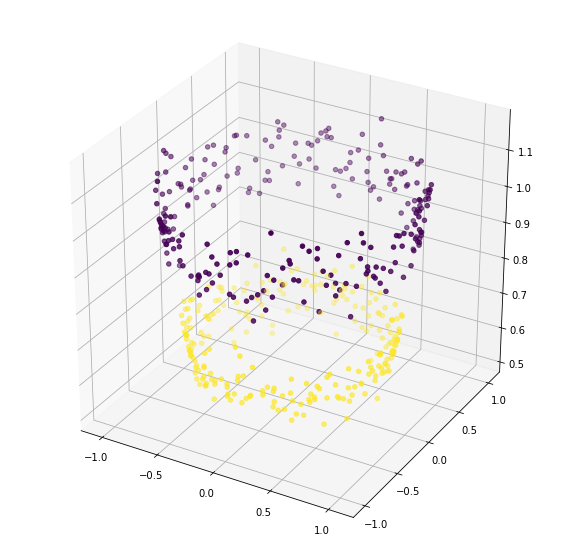

In [49]:
plot3d(X_,Y)

### Applying Logistic Classifier 

In [50]:
# To classify the data we have 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score 
lr=LogisticRegression()

In [51]:
#Acuracy if we used 2 dimensional data 
acc=cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy in 2D is ", (acc*100))

Accuracy in 2D is  44.800000000000004


In [52]:
# Accuracy if we used 3 dimensional data 
acc=cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy in 3D is ",(acc*100))

Accuracy in 3D is  100.0


In [53]:
# Train The data 
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# Coefficients of weight 
wts=lr.coef_

In [55]:
#Bias term or intercept 
bias=lr.intercept_

In [56]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))

In [62]:
print(xx)
print(yy)
zz=-(wts[0,0]*xx+wts[0,1]*yy+bias)/wts[0,2]

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


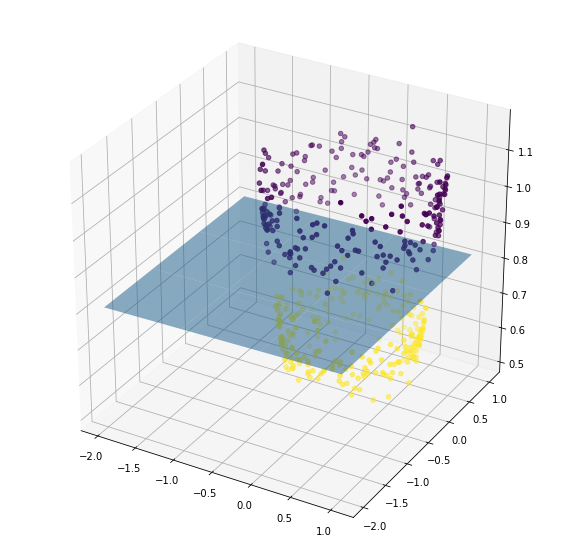

In [66]:
axis_object=plot3d(X_,Y,False) 
axis_object.plot_surface(xx,yy,zz,alpha=0.5)
plt.show()